<a href="https://colab.research.google.com/github/developerTamanna/Home_Cleaning_Services_Analysis/blob/main/Home_Cleaning_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Step 2: load the data

In [7]:
df = pd.read_csv('Beverage Manufacturing (1).csv')
output =[]
output.append("Exploratory Data Analysis of /Beverage Manufacturing (1).cs\n")
output.append("==============\n")

step3 explore the data

In [8]:
print(df.head())
output.append(f"first few rows:\n{df.head()}\n")

         Date        Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-12-07         Juices  North        Retail       217   2.67      0.17   
1  2024-05-01          Water  South     Wholesale       519   2.63      0.14   
2  2024-05-15         Juices  South        Retail       478   1.95      0.13   
3  2024-08-07         Juices   West     Wholesale       547   1.08      0.21   
4  2024-11-09  Energy Drinks   West     Wholesale       882   1.65      0.23   

   Revenue  
0   480.89  
1  1173.87  
2   810.93  
3   466.70  
4  1120.58  


step4:clean the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [12]:
output.append("data cleaning result:\n")
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"missing values:\n{missing_values}\n")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [14]:
#check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}/n")
df.drop_duplicates(inplace=True)

step5: analyze the data

In [19]:
#total Revenue from cleaning services
total_revenue = df['Price'].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $2710.35


In [21]:
#average price per customer_type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price Per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Retail       2.702183
Wholesale    2.717919
Name: Price, dtype: float64


In [22]:
#total service provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
East     269
North    252
South    248
West     231
Name: count, dtype: int64


In [24]:
#total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Regon:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)


Region
East     717.72
North    682.56
South    666.86
West     643.21
Name: Price, dtype: float64


Step6: Visualize the data

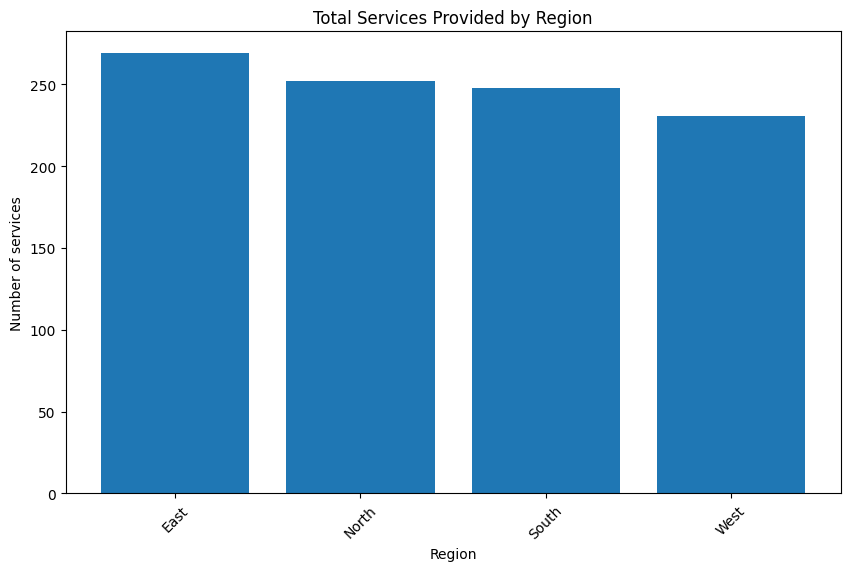

In [26]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

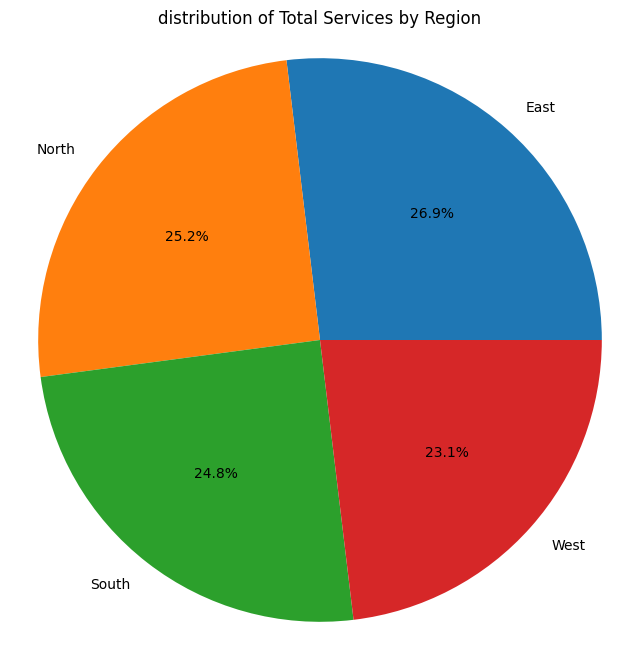

In [29]:
#pie chare for total services by region
plt.figure(figsize=(8, 8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('distribution of Total Services by Region')
plt.axis('equal')
plt.savefig('service_distribution_by_region.png')
plt.show()

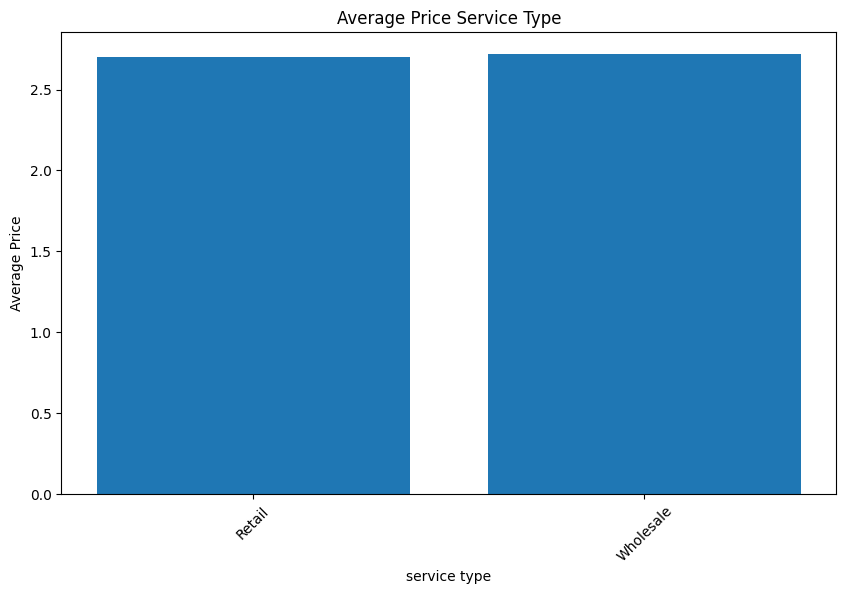

In [31]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price Service Type')
plt.xlabel('service type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

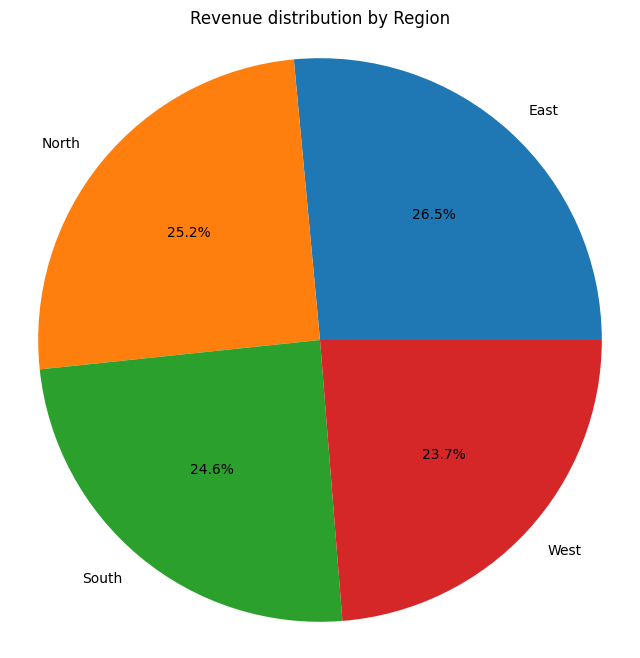

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue distribution by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region.png')
plt.show()

Save output in file

In [35]:
#save output to a txt file
with open('analysis_output.txt', 'w') as f:
  f.writelines(output)